In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('Seattle2014.csv')
df.head()

,STATION,STATION_NAME,DATE,PRCP,SNWD,SNOW,TMAX,TMIN,AWND,WDF2,WDF5,WSF2,WSF5,WT01,WT05,WT02,WT03
0,GHCND:USW00024233,SEATTLE TACOMA INTERNATIONAL AIRPORT WA US,20140101,0,0,0,72,33,12,340,310,36,40,-9999,-9999,-9999,-9999
1,GHCND:USW00024233,SEATTLE TACOMA INTERNATIONAL AIRPORT WA US,20140102,41,0,0,106,61,32,190,200,94,116,-9999,-9999,-9999,-9999
2,GHCND:USW00024233,SEATTLE TACOMA INTERNATIONAL AIRPORT WA US,20140103,15,0,0,89,28,26,30,50,63,72,1,-9999,-9999,-9999
3,GHCND:USW00024233,SEATTLE TACOMA INTERNATIONAL AIRPORT WA US,20140104,0,0,0,78,6,27,40,40,45,58,1,-9999,-9999,-9999
4,GHCND:USW00024233,SEATTLE TACOMA INTERNATIONAL AIRPORT WA US,20140105,0,0,0,83,-5,37,10,10,67,76,-9999,-9999,-9999,-9999


## Columns description 

In [4]:
#Dropping columns with inconsistent data 

columns_to_drop = ['WT01', 'WT02', 'WT03', 'WT05']
df = df.drop(columns=columns_to_drop)

In [5]:
df.columns

Index(['STATION', 'STATION_NAME', 'DATE', 'PRCP', 'SNWD', 'SNOW', 'TMAX',
       'TMIN', 'AWND', 'WDF2', 'WDF5', 'WSF2', 'WSF5'],
      dtype='object')

In [6]:
rainfall = df['PRCP'].values
inches = rainfall/254  # 254 tenths of mm = 1 inch
inches.shape

(365,)

# The table contains 365 values, giving the daily precipitation in inches from January 1 to December 31, 2014.

<function matplotlib.pyplot.show(close=None, block=None)>

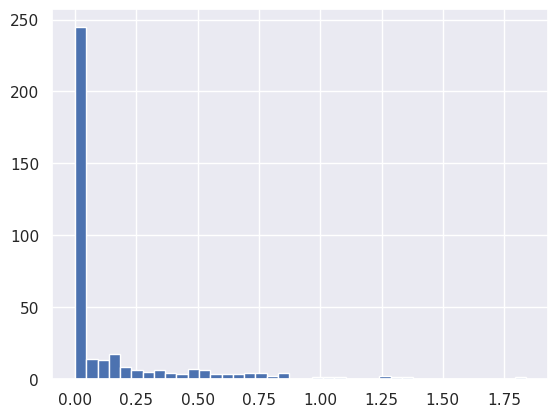

In [8]:
import matplotlib.pyplot as plt
import seaborn
seaborn.set()
plt.hist(inches, 40)
plt.show

## In 2014, the vast majority of days in Seattle saw near the zero measured rainfall.

In [10]:
# Let's use numpy to count rainy days within the year

print('Number of days without rain: ', np.sum(inches == 0))
print('Number of days with rain: ', np.sum(inches != 0))
print('Number of days with rain more than 0.5 inches: ', np.sum(inches>0.5))
print('Number of days with rain < 0.2 inches: ', np.sum((inches > 0)& (inches < 0.2)))

Number of days without rain:  215
Number of days with rain:  150
Number of days with rain more than 0.5 inches:  37
Number of days with rain < 0.2 inches:  75


In [11]:
# Monthly rainy days 

df['DATE'] = pd.to_datetime(df['DATE'], format='%Y%m%d')
df['Month'] = df['DATE'].dt.month
monthly_rainy_days = df[df['PRCP'] > 0].groupby('Month').size()

# Mapping the month number to the month abbreviation with a dictionary

month_mapping = {1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun', 
                 7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'}

monthly_rainy_days.index = monthly_rainy_days.index.map(month_mapping)


print('Monthly rainy days:\n')
print(monthly_rainy_days)


Monthly rainy days:

Month
Jan    13
Feb    19
Mar    20
Apr    13
May     8
Jun     9
Jul     2
Aug     7
Sep     9
Oct    19
Nov    16
Dec    15
dtype: int64


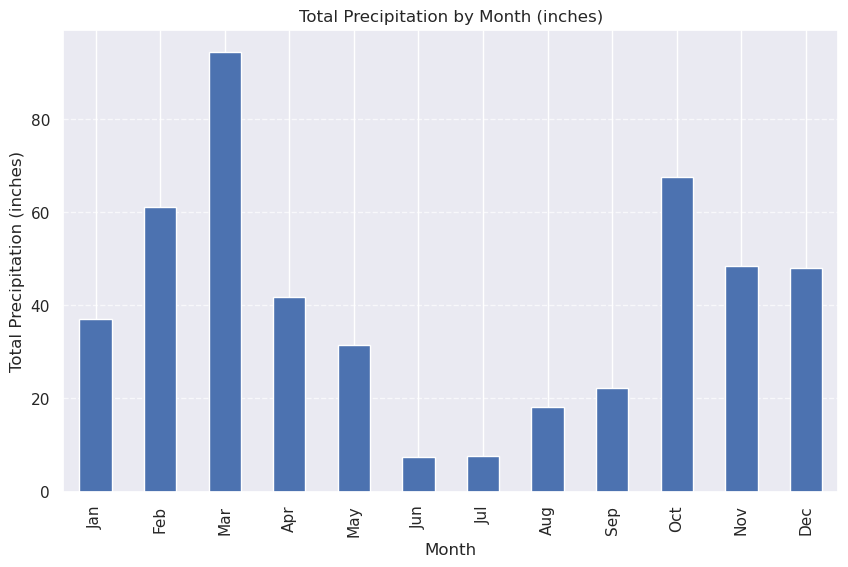

In [12]:
# Filtering for rainy days and summing precipitation by month
monthly_precipitation_mm = df[df['PRCP'] > 0].groupby('Month')['PRCP'].sum()

# Convert from millimeters to inches
monthly_precipitation_in = monthly_precipitation_mm / 25.4

# Plotting
plt.figure(figsize=(10, 6))
monthly_precipitation_in.plot(kind='bar')
plt.title('Total Precipitation by Month (inches)')
plt.xlabel('Month')
plt.ylabel('Total Precipitation (inches)')
plt.xticks(ticks=range(0, 12), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


In [13]:
# Let's identify extreme rainfall > 1 inch

extreme_rainfall = df[df['PRCP'] > 254]  # 254 tenths of mm = 1 inch
print(extreme_rainfall[['DATE', 'PRCP']])

          DATE  PRCP
46  2014-02-16   264
63  2014-03-05   467
66  2014-03-08   323
74  2014-03-16   277
122 2014-05-03   333
294 2014-10-22   320
331 2014-11-28   343


In [14]:
# Create the PRCP column in inches
df['PRCP_in'] = df['PRCP'] / 254.0

# Calculate the number of rainy days with less than 0.2 inches of rain excl. zero
rainy_days_below_0_2 = df[(df['PRCP_in'] < 0.2) & (df['PRCP_in'] > 0)].shape[0]

# Calculate the number of rainy days with more than 0.5 inches of rain
rainy_days_above_0_5 = df[df['PRCP_in'] > 0.5].shape[0]

print(f'Number of rainy days with less than 0.2 inches: {rainy_days_below_0_2}')
print(f'Number of rainy days with more than 0.5 inches: {rainy_days_above_0_5}')

Number of rainy days with less than 0.2 inches: 75
Number of rainy days with more than 0.5 inches: 37


In [15]:
# Let's identify correlation with temperatures 

rain_temp_corr = df[['PRCP', 'TMAX', 'TMIN']].corr()
print(rain_temp_corr)

          PRCP      TMAX      TMIN
PRCP  1.000000 -0.222669 -0.057217
TMAX -0.222669  1.000000  0.871786
TMIN -0.057217  0.871786  1.000000


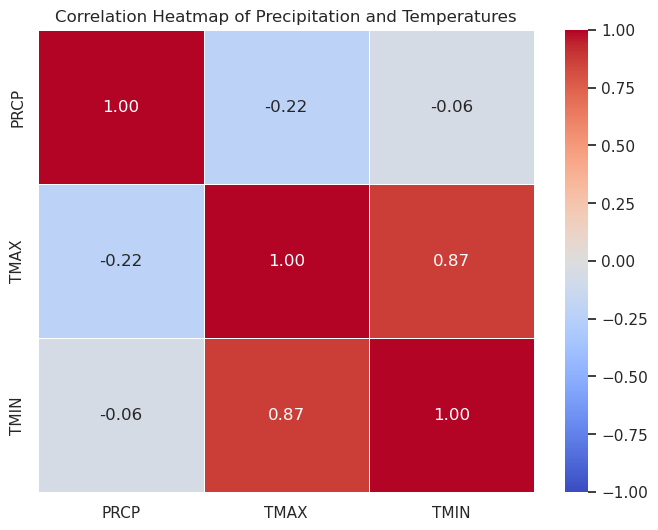

In [16]:
# Let's visualize the correlation - Plotting the heatmap

plt.figure(figsize=(8, 6))
seaborn.heatmap(rain_temp_corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1, fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap of Precipitation and Temperatures')
plt.show()


## Summary of Insights:
TMAX and TMIN are closely related, showing that days with high maximum temperatures often have higher minimum temperatures, which aligns with typical weather behavior.

PRCP (rainfall) has little correlation with either maximum or minimum temperatures, meaning temperature alone doesn't seem to significantly drive rainfall patterns, at least in a simple linear way.

# Distribution of rainfall or a time series of rainfall events.

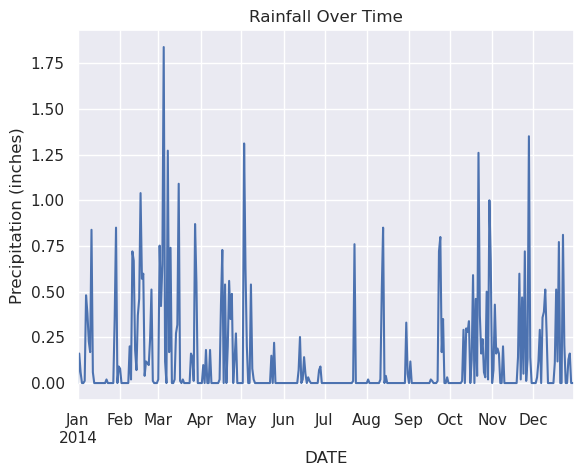

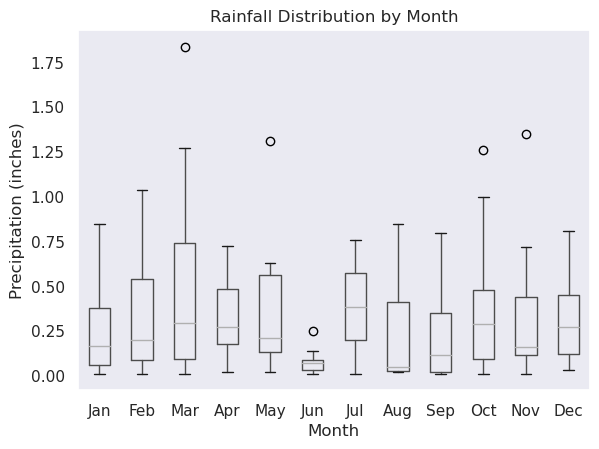

In [19]:
# Convert precipitation from tenths of mm to inches
df['PRCP_in'] = df['PRCP'] /10 / 25.4

# Time series plot of rainfall
df.set_index('DATE')['PRCP_in'].plot(title='Rainfall Over Time')
plt.ylabel('Precipitation (inches)')
plt.show()

# Box plot for rain distribution by month

df['DATE'] = pd.to_datetime(df['DATE'], format='%Y%m%d')
df['Month'] = df['DATE'].dt.month

month_mapping = {1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun',
                 7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'}

# Add a new column 'Month_Name' that maps the month numbers to month names
df['Month_Name'] = df['Month'].map(month_mapping)

# Convert 'Month_Name' to a categorical type with a specific order
month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
               'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

df['Month_Name'] = pd.Categorical(df['Month_Name'], categories=month_order, ordered=True)

#Plotting 
df[df['PRCP'] > 0].boxplot(column='PRCP_in', by='Month_Name', grid=False)
plt.title('Rainfall Distribution by Month')
plt.suptitle('')  # Removes the default 'Boxplot grouped by Month' title
plt.xlabel('Month')
plt.ylabel('Precipitation (inches)')
plt.show()


# Let's visualize the relationship between minimum temperatures, maximum temperatures, and rainfall.

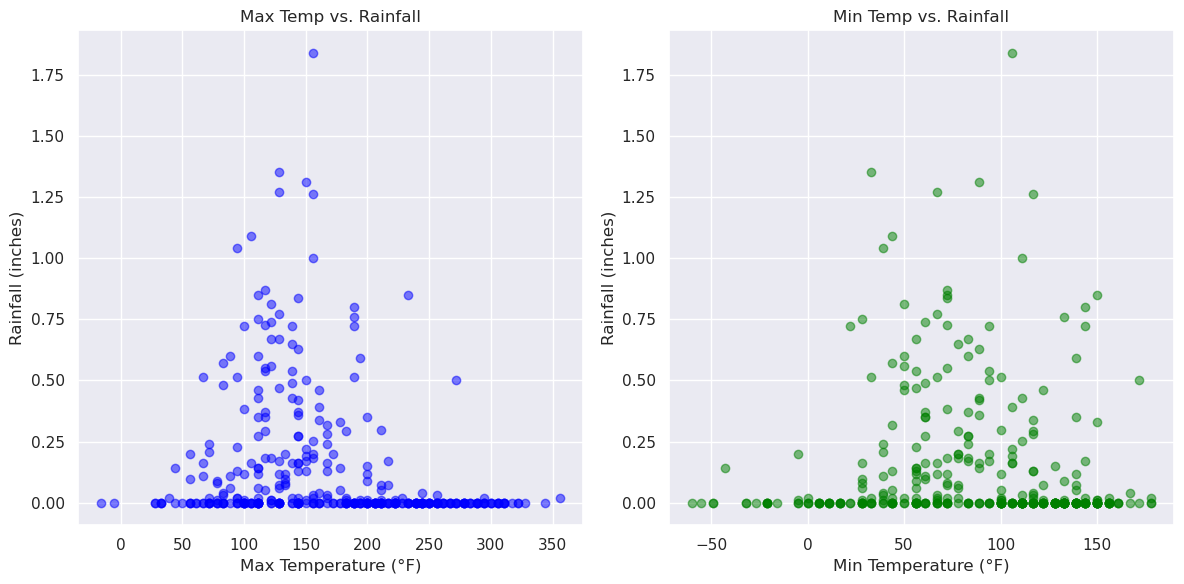

In [21]:
# Scatter plot for Max Temp vs. Rainfall
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.scatter(df['TMAX'], df['PRCP']/254, alpha=0.5, color='blue')
plt.title('Max Temp vs. Rainfall')
plt.xlabel('Max Temperature (°F)')
plt.ylabel('Rainfall (inches)')

# Scatter plot for Min Temp vs. Rainfall
plt.subplot(1, 2, 2)
plt.scatter(df['TMIN'], df['PRCP']/254, alpha=0.5, color='green')
plt.title('Min Temp vs. Rainfall')
plt.xlabel('Min Temperature (°F)')
plt.ylabel('Rainfall (inches)')

plt.tight_layout()
plt.show()


## What did we learn : 

From the analysis of Seattle's 2014 weather data, we can observe that the vast majority of days saw little to no rainfall. Of the 365 days, 215 had no measurable precipitation, while 150 days experienced rainfall. Rainy days in Seattle tend to be cooler, with lower maximum and minimum temperatures compared to dry days. Most rainy days had less than 0.2 inches of rain, indicating that while it rained often that year in Seattle, it typically was not heavy rainfall. In fact, only 37 days had more than 0.5 inches of rain and only 7 days had more than 1 inch of rain. 
